In [2]:
!pip install vanna

  Using cached vanna-0.7.6-py3-none-any.whl.metadata (15 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
  Using cached flask_sock-0.7.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached flasgger-0.9.7.1.tar.gz (4.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached simple_websocket-1.1.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
Using cached vanna-0.7.6-py3-none-any.whl (209 kB)
Using cached flask_sock-0.7.0-py3-none-any.whl (4.0 kB)
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/65.9 MB ? et


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import vanna
from vanna.remote import VannaDefault

In [6]:
api_key = '1e07cc4d240d4d899748054c45aa40de'

In [7]:
vn = VannaDefault(model='chinook', api_key=api_key)
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

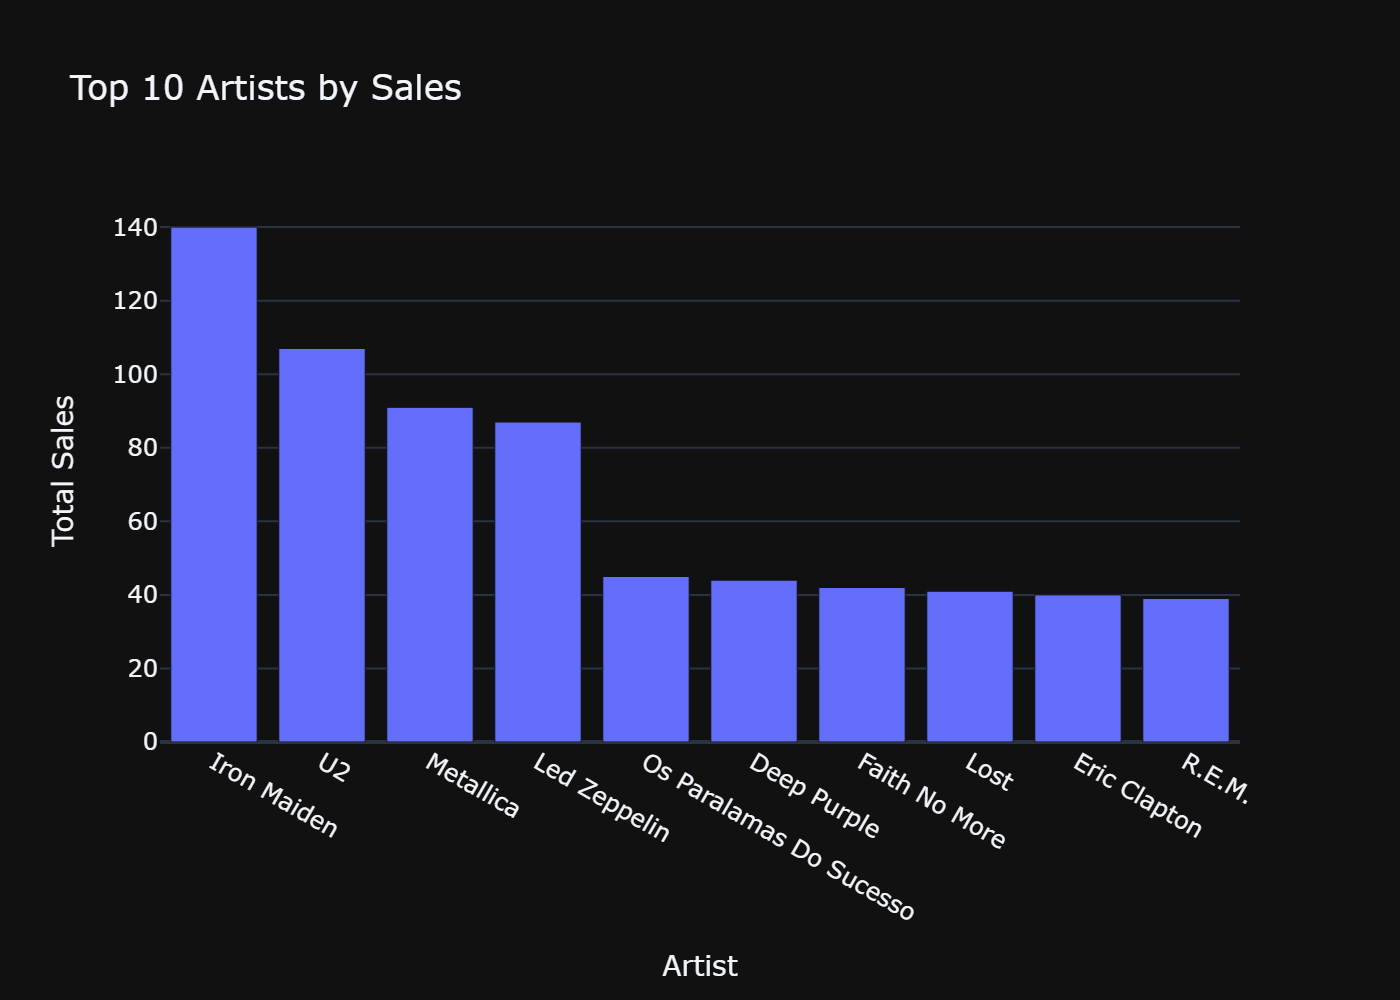

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45
 5        58              Deep Purple          44
 6        82            Faith No More          42
 7       149                     Lost          41
 8        81             Eric Clapton          40
 9       124                   R.E.M.          39,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Artist=%{x}<br>Total Sales=%{y}<extra></extra>',
               'legendgroup': '',
         

In [8]:
vn.ask('What are the top 10 artists by sales?')

In [ ]:
from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
None


Traceback (most recent call last):
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2213, in __call__
    return self.wsgi_app(environ, start_response)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2193, in wsgi_app
    response = self.handle_exception(e)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_reques

None
None
